# Final Project Baseline: House Prices- Advanced Regression Techniques
### Author: Radia Abdul Wahab, Parham Motameni, Jun Qian
### Date: Fall 2021
### Course: w207 Machine Learning



# 

## **Table of Contents:**

#### **Project Summary**

#### **Description of Data and Data source**

#### **Installations and Libraries**

#### **Dataset Exploratory Analysis**

>Format of Data

>Summmary Statistics


#### **Step-By-Step performance of algorithms**

>...

>...



#### **Conclusion**
#### **Further work for final submission**



# 

# Project Overview


- **Motivation**:
How much would you pay for a house? That is often one of the hardest questions to answer. When buying a house or selling a house, it is very crucial to determine the right pricing, since house prices change over time and each house its own "$ rating". 

Three main aspects determine the price of a house. 
1. Condition
2. Features (Number of rooms, square footage etc)
3. Location
    
These 3 properties can be defined under a large set of sub-properties. The **Ames Housing dataset** was compiled by **Dean De Cock**, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This data set (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) is being used for this project to demonstrate the use of various Machine Learning techniques, to be able to have the algorithm perform the difficult task of deciding what the house price should be. 

 
- **Baseline Project Goals**: Through this baseline project we are trying to answer 3 main questions:
1. What combination of aspects of a house most determines the sale-price?
2. Can Regression based prediction be used to estimate the price of the house?
3. What is the best accuracy that can be achieved by using such algorithms?


- **Baseline Overall Strategy**: The general strategy we followed to come to the conclusion has been:
1. Thorough review of the description of data provided (including background research)
2. Reviewing ALL of the variables, in order to avoid omitted variable bias. 
3. Making a list of ordinal, categorical parameters that seem to be strongly correlated, to be used in decision tree based algorithms for later stages of project including final submission
4. EDA of ALL integer based paremeters
5. Shortlisting parameters that show strong trends and removing any categorical numerical variables
6. Perform Regression using only the shortlisted parameters
7. First pass accuracy assessment of basic linear regression without any data cleaning
8. Removing outliers, redoing linear regression, recalculating accuracy to show improvement


We have answered the above questions stated under "Baseline Project Goals" by Exploring the data (EDA) and performing Linear Regression on a selected set of parameters. The outcome is delailed below

- **Outcome**:

1. The 10 important parameters are: ...
2. Linear regression line fit can be obtained
3. Accuracy of prediction with a linear regression fit is >80%

- **Baseline Submission Content**:
For this baseline submission we show an overview of exploratory data analysis (EDA), and demonstrate the data  with sufficient visuals. We then set up a pipeline to demonstrate feasibility of using this data to perform prediction on house prices. 

In this report we have also included:

1. The format of the data
2. The various paremeters given
3. Distribution of the integer based parameters by visualization
4. Descripencies of those parameters and how those will effect us
5. Short listed parameters and justification for choice
6. Demonstration of a simple regression algorithm to show a regression fit
7. Visualizaion of regression line fit 
8. Visualization of actual vs predicted values to demonstrate fit
9. Accuracy estimates
10. Summary Statistics?
11. Conclusion
12. Further work
   

- **Further work**:
Feature engineering and advanced regression techniques





# 

# Description of Data and Data Source


- **Data Source**:




- **Description of Data**:



In [ ]:
"""
# New Section Heading:
"""

In [ ]:
"""

from IPython.display import Image, display

display(Image(filename='Images/Image1.png'))

"""

# Code Base with outcomes and assesments

## Import all Libraries:

In [85]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import libraries.
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import sklearn
sklearn.__version__

'0.23.2'

In [86]:
# download data file if it is not ready
data_path = 'train.csv'
data_file = Path(data_path)
if data_file.is_file():
  print("Datafile is already loaded.")
else :
 !mkdir '/content/data/'
 !curl -L "https://drive.google.com/uc?export=download&id=1ortEJfmlpt9-dbg5f6cTDt5nicswf5wT" > '/content/data/test.csv'
 !curl -L "https://drive.google.com/uc?export=download&id=1EG5jP5RDEIsNAMaF2m42KOyz-ZVjC8wS" > '/content/data/train.csv'
df = pd.read_csv(data_path)	

Datafile is already loaded.


In [87]:
# lock the seed to have repeatable results
random.seed(100)

## Split training data into our own train and test data:
#### The "test.csv" is an unlabelled set. Therefore in order to assess performance we are splitting the train.csv into our own training, development and test set as needed
#### We are using split() to ensure random distribution of data points
#### We are starting off with ~10% of the train set into a test group

In [88]:
# Create train, dev, test datasets
# for features we do not need Id and we need to remove SalesPrice
df_X = df.drop(['SalePrice','Id'], axis=1)
df_y = df[['SalePrice']].copy()
# split data into Test and train 
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.10, random_state = 1)

# TODO split more to dev set if needed!

In [89]:
print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')
print(type(df))
print(type(X_train))
X_train.head()

X_train size: (1314, 79), X_test size: (146, 79)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
418,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1338,60,RL,95.0,13450,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
931,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,Normal
780,20,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


## Initial Look at the data:
1.  Our **train** set now is **1314 long** (1314 labelled houses)
2.  Our **test** set now is **146 long** (146 labelled houses)
3.  Each house has **79 features**. 
4.  Features are a mix of **nominal, ordinal and categorical**
5.  We will have to be cognisant of the different data types for ALL our assessments

In [90]:
print(f'yy_train size: {y_train.shape}, y_test size: {y_test.shape}')
y_train.head()

yy_train size: (1314, 1), y_test size: (146, 1)


,SalePrice
418,126000
782,187100
1338,200000
931,117500
780,176000


## Initial Look at the data labels:
1. The label set only has one column **Sale Price**
2. Indexes match with the train set above
3. The train set and test set labels are of same lenght (1314 and 146 respectively)

## Taking a look at what the features are
Additionally reviewed the data_description.txt file. The column names and the names on the file correspond accurately

In [118]:
# Convert the column names into a list and print list

feature_list = X_train.columns.values.tolist()
feature_list

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

# First pass with Nominal values ONLY

First lets work on the nominal variables.

I would like to see how the data points are distributed, before any data cleaning

In [120]:
#isolating all nominal value formats
#Using a list of python var types to filter through all the columns
#Initial nominal value list is "int_feature_list"

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

nominal_df = X_train.select_dtypes(include=numerics)

int_feature_list = nominal_df.columns.values.tolist()
int_feature_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### There is still a LOT of variable to choose from

#### Lets take a look at roughly how the data statistics is distributed. This won't help us much, but good to take a look

In [119]:
nominal_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1314.000000,1081.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1306.000000,1314.000000,1314.000000,...,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,57.207002,70.093432,10566.673516,6.108828,5.577626,1971.636225,1984.888889,103.946401,445.920091,46.197869,...,472.901826,92.470320,47.273212,22.270928,3.584475,14.875951,2.572298,46.910198,6.341705,2007.815068
std,42.456911,24.557445,10362.474799,1.373628,1.099256,30.089257,20.669705,178.273117,458.704926,162.758084,...,213.402684,121.923744,67.009377,61.684006,30.150108,55.567081,38.415451,522.284990,2.703074,1.323541
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.000000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,480.000000,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,719.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## Plotting all the nominal values to take a look at the data distribution

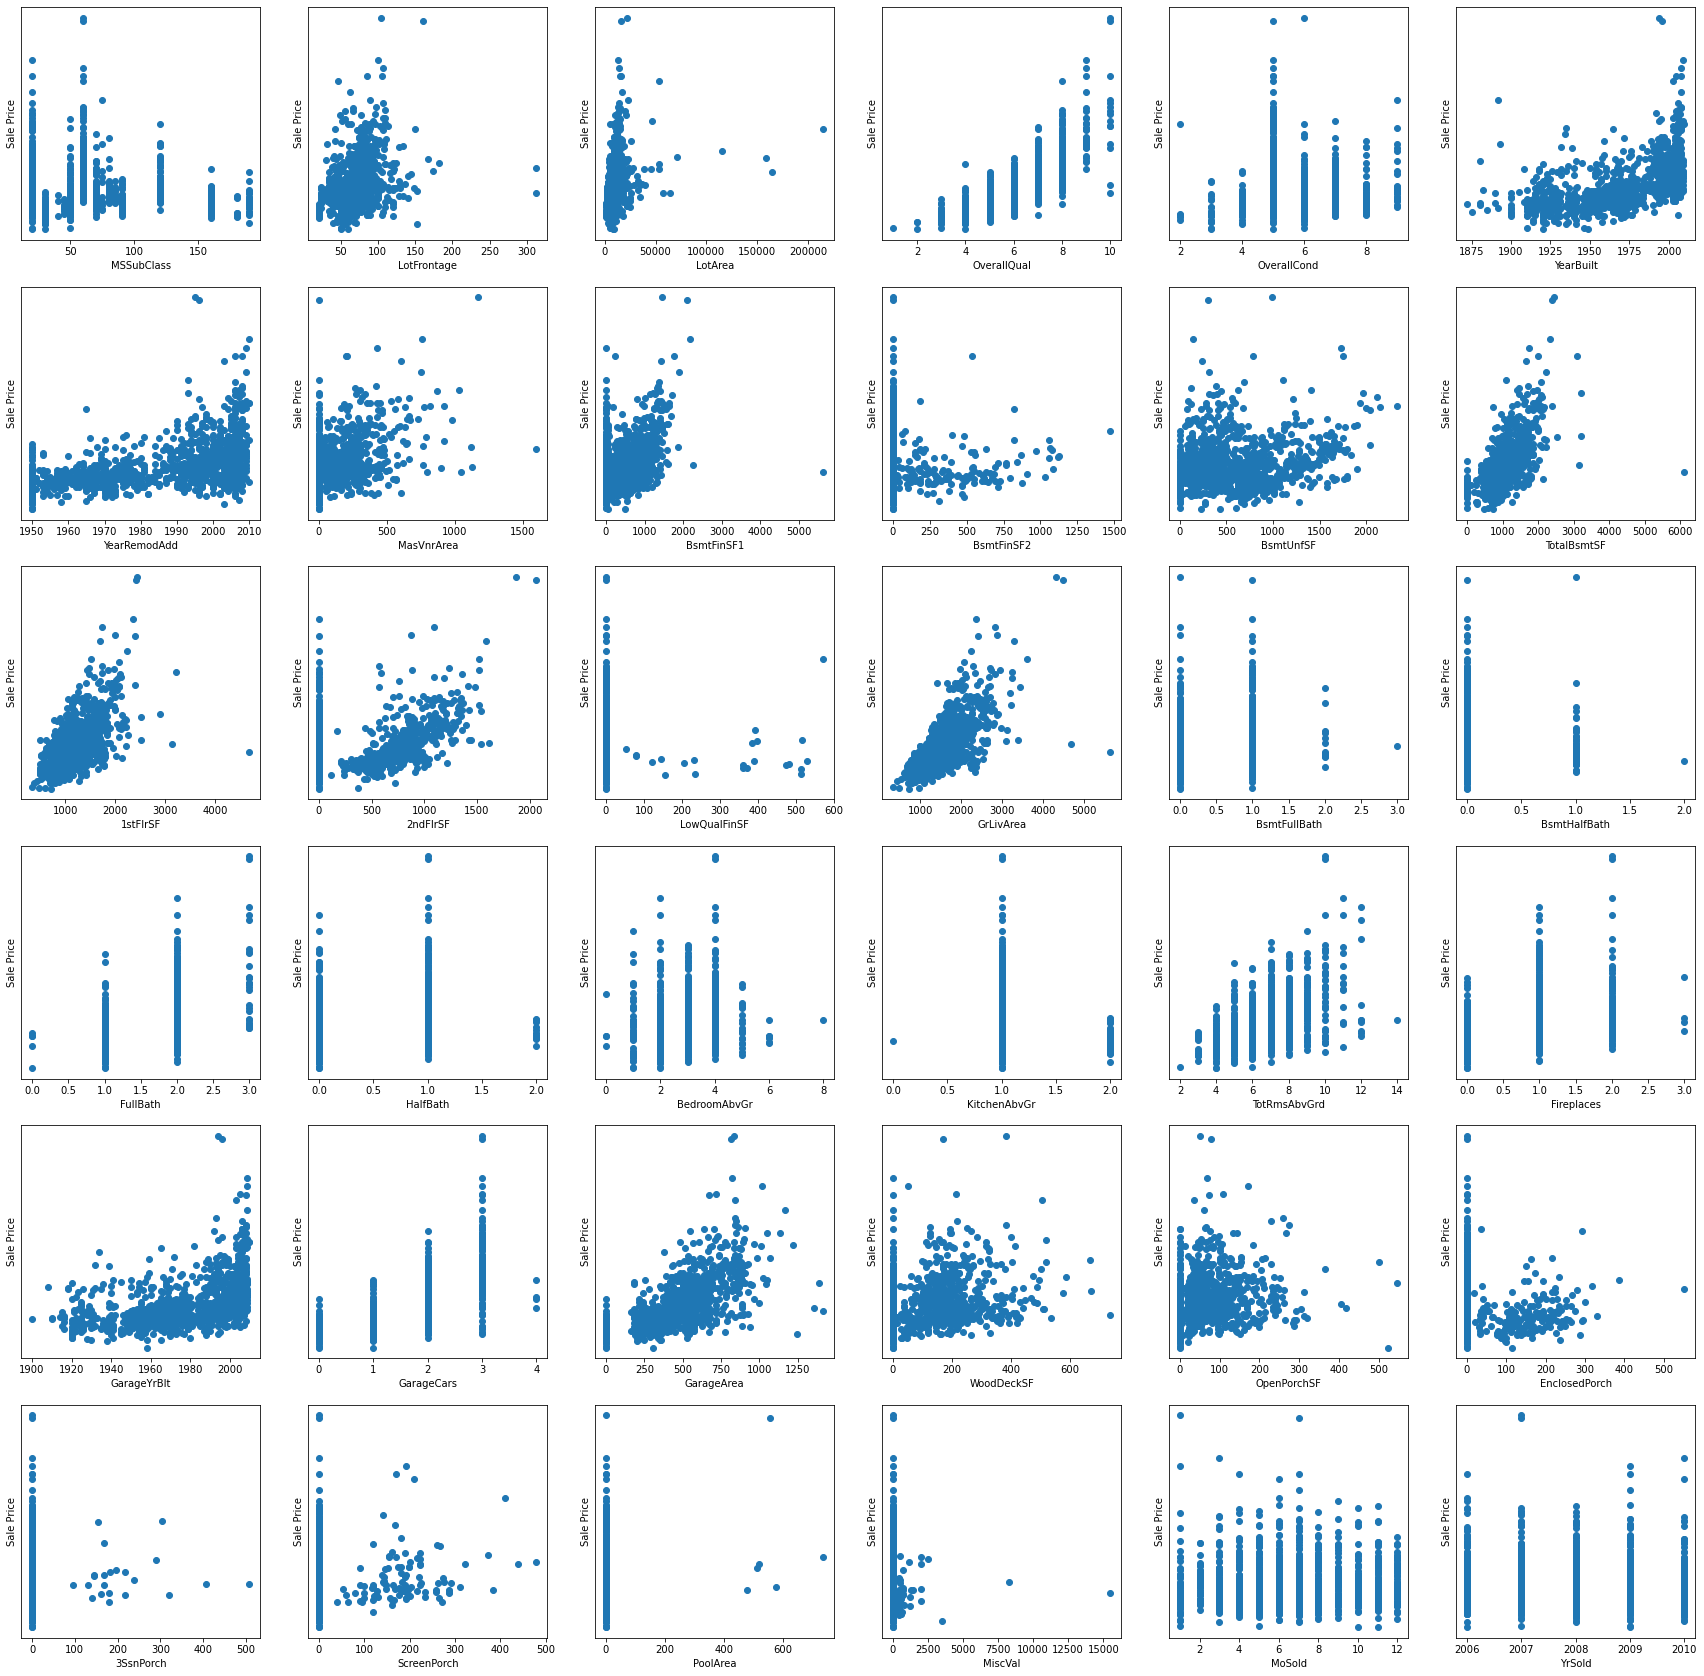

In [121]:
# Using the shortlisted feature list, run a for loop to plot all the data points
# int_feature_list has been created a few cells above
# int_feature_list contains all the columns that have some sort of numbers in them (int, float etc)

k=1
plt.figure(figsize=(30,30)) #Using a large figsize to make it easy to visualize everything

for feature in int_feature_list: 
    """ Looping through the int_feature_list
        plotting each of the columns from the train matrix on the horizontal axis
        against SalePrice (data labels) on the vertical axis
        in order to "view" any obvious correlation or non-correlation
    """
    output= ['SalePrice']
    plt.subplot(6, 6, k)
    plt.scatter(X_train[feature].values, y_train[output].values);
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.yticks([])
    k=k+1

plt.show()

# For each integer parameter make a first off decision on what needs to be done with that parameter
## 

### In this section we review ALL the variables. 
### We look at each plot above, as well as the description provided to us in data_description.txt
### We "plan ahead" what we could potentially do with each variable/feature
### However, we will not be including ALL of these features in our baseline evaluation
## 

1. **MSSubClass**: Identifies the type of dwelling involved in the sale.

Need to convert this to categorical, or ordinal. For Baseline we will not be using this. In terms of conversion to ordinal, this is not ordered currently. We will need to identify what criteria should be used to order these. However, this variable determines the type of property and is ultimately a critical feature that needs to be captured in the final ML algorithm.

2. **LotFrontage**: Linear feet of street connected to property

Need to remove values above 200. They are clearly outliers that are skewing the data on the right

Once we remove the outliers, we should see a good correlation, visually

3. **LotArea**: Lot size in square feet

This is an important parameter

However, looking at the scatter plot, I would say there are a few outliers that significantly skew the data

we should remove any values that are >50K and perform our final analysis.

Once we remove the outliers above 50k, we should get a reasonable correlation

4. **OverallQual**: Rates the overall material and finish of the house

Similar to the MSSubClass, this is actually a ordinal variable with a numerical rating. 

From the description.txt, it seems like it is ordered in the right way. 

5. **OverallCond**: Rates the overall condition of the house

Same feedback as OverallQual

6. **YearBuilt**: Original construction date

Can be used as-is for now. Keeping in mind, this is a time variable

7. **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)

This is a tricky parameter. we need to figure out what to do with the data points where the house was not remodeled but is copying the construction date

Looking at the scatter plot, rest of the data points seem good. My only concern is the piling up of data on 1950

Also need to keep in mind this is a time variable

8. **MasVnrArea**: Masonry veneer area in square feet
Need to remove zero value 

Asses with  vs without Masonry veneer (consider using as binary variable in the final ML)
Then if with Masonry veneer, perform correlation assessment. 

9. **BsmtFinSF1**: Type 1 finished square feet
Need to remove zero values

Asses with basement vs without (consider using binary assessment)
Then if with basement, need to remove '0' values and perform correlation

10. **BsmtFinSF1**: Type 1 finished square feet, **BsmtFinSF2**: Type 2 finished square feet, **BsmtUnfSF**: Unfinished square feet of basement area. **TotalBsmtSF**: Total square feet of basement area

Remove zeros
Identify creative ways to combine these variables into one, and use some form of a rating to convert into ordinal to perform assessment. Or use decision tree.

11. **1stFlrSF**: First Floor square feet, **2ndFlrSF**: Second floor square feet

Perform assessment on total square feet.

For second floor square feet, remove the zero values

12. **LowQualFinSF**: Low quality finished square feet (all floors)

This to me should be a binary classifier. There is a vertical line on zero, and all other data points can be represented with almost a horizontal line

13. **GrLivArea**: Above grade (ground) living area square feet

Destribution of data point is almost identical to 1stFlrSF. This is not a suprise. I don't think we should include this variable. This will diminish the effects of the original variable (1stFlrSF or overall SF)

14. **BsmtFullBath**: Basement full bathrooms, **BsmtHalfBath**: Basement half bathrooms, **FullBath**: Full bathrooms above grade, **HalfBath**: Half baths above grade

All bathroom formats should be combined into a ordinal format. Need to figure out how. we could do it based on mean. The higher the mean sale price, higher the ordinal value.

15. **Bedroom**: Bedrooms above grade (does NOT include basement bedrooms), **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

Traditionally, this is a huge contributing factor. Lets see how we can capture this

Need to combine Bedrooms and total room somehow

Decision tree might be a good option for this

16. **Kitchen**: Kitchens above grade

Very interesting distribution. seems to be a negative correlation

17. **Fireplaces**: Number of fireplaces

I think we can deprioritize this variable for now, but include in final ML

18. **GarageYrBlt**: Year garage was built

This is an important variable. Can use as is. But need to remove zeroes

19. **GarageCars**: Size of garage in car capacity

important variable. looks like good correlation

20. **GarageArea**: Size of garage in square feet

Good variable. Need to remove zeroes

21. **WoodDeckSF**: Wood deck area in square feet, **OpenPorchSF**: Open porch area in square feet, **EnclosedPorch**: Enclosed porch area in square feet, **3SsnPorch**: Three season porch area in square feet, **ScreenPorch**: Screen porch area in square feet, **PoolArea**: Pool area in square feet

These can be combined into some "additional amenities". can keep the sqft measure. need to decide

In any case, need to remove zeroes. 

22. **MiscVal**: $Value of miscellaneous feature

Need to figure out how we can include this. I dont think we can add the value to the total. because value of misc features might actually hold lesser real value.

will deprioritize this for now and think about it. 

23. **MoSold**: Month Sold (MM), **YrSold**: Year Sold (YYYY):

Effects of year seems to be negligible... maybe because it is over a very short duration. Month to Month variability is more significant





## From the above assessment it is clear that we might need to heavily depend on learning algorithms that are designed for categorical data as well as nominal data

### At this point we will make two lists of "Important Variables" from either category, so we can perform an initial baseline assessment

# In this section, we prioritize which Nominal/Ordinal Variables to work on for baseline

1. LotFrontage
2. LotArea
3. OverallQual
4. OverallCond
5. Yearbuilt
6. YearRemodAdd
7. GrLivArea
8. Bathroom (Need to sum all the types)
9. GarageYrBlt
10. GarageCars
11. GarageArea

# In this section, we prioritize which Categorical Variables to work on for baseline
1. MoSold
2. MSZoning
3. BldgType
4. HouseStyle
5. ExterCond (Convert to Ord)
6. Foundation
7. BsmtFinType1 (Convert to Ord)
8. Heating
9. CentralAir (Convert to Binary)
10. KitchenQual



## Shrinking the DataFrame to only include the selected variables

In [124]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
418,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1338,60,RL,95.0,13450,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
931,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,Normal
780,20,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [125]:
#Selected dataframe

selected_X_train = X_train[["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]]
selected_X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,GarageYrBlt,GarageCars,GarageArea
418,60.0,8160,5,6,1940,1950,1134,1940.0,1,240
782,67.0,16285,7,5,2001,2002,1430,2001.0,2,605
1338,95.0,13450,7,5,2002,2002,1861,2002.0,2,492
931,70.0,9100,5,6,1965,1965,925,1965.0,1,429
780,63.0,7875,7,5,1995,1996,1253,1995.0,2,402


In [127]:
#Convert selected dataframe into a numpy array for subsequent calculations

selected_array_train=selected_X_train.to_numpy()

#Check to see if it worked
print(type(selected_X_train))
print(type(selected_array_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [128]:
#Remove NaN values from train array
#Check the data in the array

selected_array_train[0]
selected_array_train[0:5]

selected_array_train = np.nan_to_num(selected_array_train, neginf=0) #Removing Nan from train array
print(selected_array_train[0:5])
#looks like my array works

[[6.0000e+01 8.1600e+03 5.0000e+00 6.0000e+00 1.9400e+03 1.9500e+03
  1.1340e+03 1.9400e+03 1.0000e+00 2.4000e+02]
 [6.7000e+01 1.6285e+04 7.0000e+00 5.0000e+00 2.0010e+03 2.0020e+03
  1.4300e+03 2.0010e+03 2.0000e+00 6.0500e+02]
 [9.5000e+01 1.3450e+04 7.0000e+00 5.0000e+00 2.0020e+03 2.0020e+03
  1.8610e+03 2.0020e+03 2.0000e+00 4.9200e+02]
 [7.0000e+01 9.1000e+03 5.0000e+00 6.0000e+00 1.9650e+03 1.9650e+03
  9.2500e+02 1.9650e+03 1.0000e+00 4.2900e+02]
 [6.3000e+01 7.8750e+03 7.0000e+00 5.0000e+00 1.9950e+03 1.9960e+03
  1.2530e+03 1.9950e+03 2.0000e+00 4.0200e+02]]


In [129]:
#Convert selected test dataframe into a numpy array for subsequent calculations
#Remove NaN values from test array
#Check the data in the array

selected_X_test = X_test[["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]]

selected_array_test=selected_X_test.to_numpy()

selected_array_test = np.nan_to_num(selected_array_test, neginf=0) #Removing Nan from test array

print(selected_array_test[0:5])

[[8.0000e+01 1.2435e+04 7.0000e+00 5.0000e+00 2.0010e+03 2.0010e+03
  1.7920e+03 2.0010e+03 2.0000e+00 5.6400e+02]
 [6.0000e+01 8.4000e+03 5.0000e+00 8.0000e+00 1.9390e+03 1.9970e+03
  2.1920e+03 1.9390e+03 1.0000e+00 2.4000e+02]
 [0.0000e+00 9.8190e+03 5.0000e+00 5.0000e+00 1.9670e+03 1.9670e+03
  9.0000e+02 1.9700e+03 1.0000e+00 2.8000e+02]
 [2.1000e+01 1.9360e+03 4.0000e+00 6.0000e+00 1.9700e+03 1.9700e+03
  6.3000e+02 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.2160e+04 5.0000e+00 5.0000e+00 1.9590e+03 1.9590e+03
  1.1880e+03 1.9590e+03 2.0000e+00 5.3100e+02]]


Data point distribution of the variables we selected for initial Linear Regression


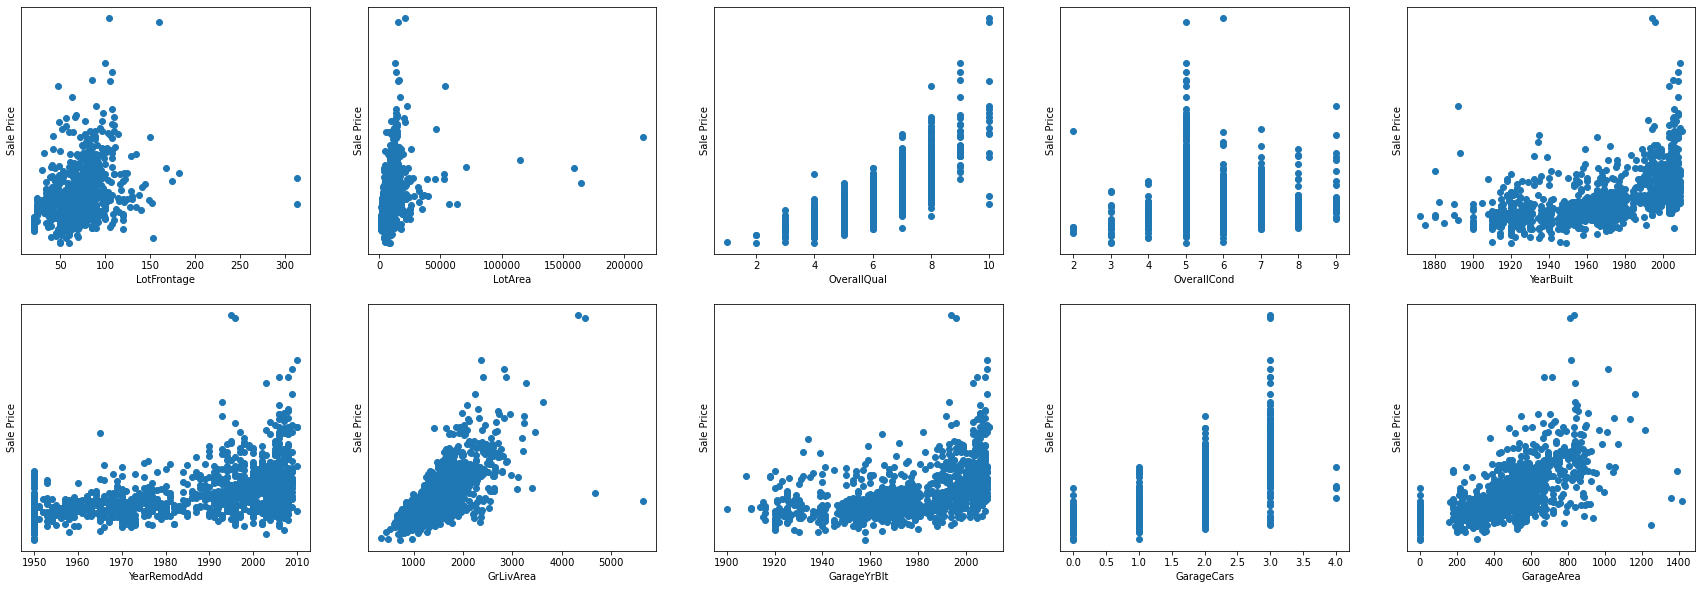

In [135]:
#Re-review the data point distribution of the variables we selected for initial linear regression

print('\033[1m' + 'Data point distribution of the variables we selected for initial Linear Regression' + '\033[0m')

int_feature_list2=["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]
k=1
plt.figure(figsize=(30,10))

for feature in int_feature_list2:
    output= ['SalePrice']
    plt.subplot(2, 5, k)
    plt.yticks([])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.scatter(X_train[feature].values, y_train[output].values)

    k=k+1
plt.show()

Corresponding Data point distribution of the variables on the test selected for initial Linear Regression

This is to make sure the test set is not significantly different from the train set.
We are cautious to not cheat at this step. But if we see any significant anomaly,
we would go back and fix the split train/test


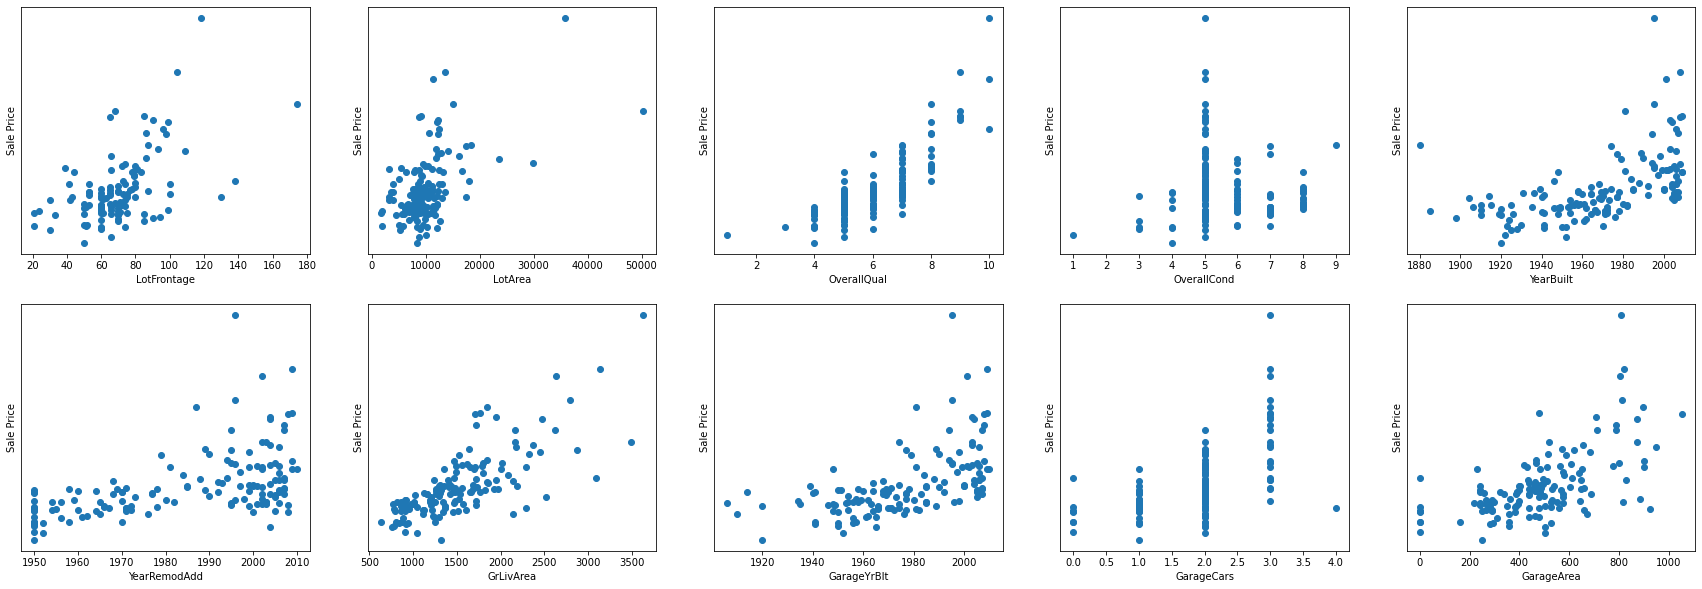

In [141]:
print('\033[1m' + 'Corresponding Data point distribution of the variables on the test selected for initial Linear Regression' + '\033[0m')
print("")
print("This is to make sure the test set is not significantly different from the train set.")
print("We are cautious to not cheat at this step. But if we see any significant anomaly,")
print("we would go back and fix the split train/test")


int_feature_list2=["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]
k=1
plt.figure(figsize=(30,10))

for feature in int_feature_list2:
    output= ['SalePrice']
    plt.subplot(2, 5, k)
    plt.yticks([])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.scatter(X_test[feature].values, y_test[output].values)
    k=k+1
    
plt.show()

In [103]:
# model fit
lm = LinearRegression(fit_intercept = True)
lm.fit(selected_array_train, y_train.values.ravel())
lm_yhat = lm.predict(selected_array_test)
#print(lm.intercept_)
#print(lm.coef_)
print ('Estimated function: y = %.2f + %.2fx' %(lm.intercept_, lm.coef_[0]))

Estimated function: y = -1107633.61 + 40.67x


Estimated function: y = 39564.48 + 0.77x


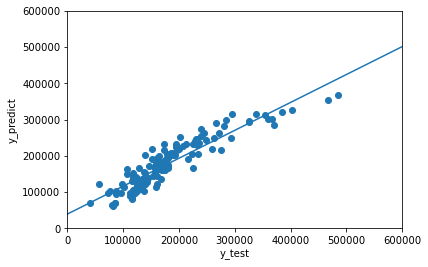

In [112]:
#plot y_test and y_predict to make sure everything looks good visually and is not completely off

plt.scatter(y_test,lm_yhat);

plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.xlim(0,600000)
plt.ylim(0,600000)

lm1 = LinearRegression(fit_intercept = True)
lm1.fit(y_test,lm_yhat)
print ('Estimated function: y = %.2f + %.2fx' %(lm1.intercept_, lm1.coef_[0]))

x=np.linspace(0, 600000)
y=39564.48 + 0.77*x
plt.plot(x,y)

#plt.show()

In [144]:
#Calculating Accurcies

print(type(y_test))
print(type(lm_yhat))

y_test2=y_test.to_numpy()
print(type(y_test2))
print("")

print('\033[1m' + "Accuracy of lm using .score"+ '\033[0m')
score=lm.score(selected_array_test, y_test.values.ravel())
print(score)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Accuracy of lm
0.8299104941443967


In [148]:
#Calculating Accuracies

print(type(y_test.values.ravel()))
print(type(lm_yhat))
print("")

print('\033[1m' + "Accuracy of lm using r2_score"+ '\033[0m')
r2_score=sklearn.metrics.r2_score(y_test,lm_yhat)
print(r2_score)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Accuracy of lm using r2_score
0.8299104941443967


## Next we perform data cleaning to remove the outliers from the following variables



## Redo the above linear regression to check if accuracy has improved

# Furtherwork